In [1]:
import sys
sys.path.append('../')

In [2]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from src.data_loading.load_data import load_data
from src.models.model import NeuralNetwork
from src.models.train_eval_model import train, test, predict

In [3]:
train_data = load_data(train=True)
train_loader = DataLoader(train_data, batch_size=64)

test_data = load_data(train=False)
test_loader = DataLoader(test_data, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
X, y = train_data[0]

In [5]:
model = NeuralNetwork()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))
loss_function = nn.CrossEntropyLoss()

for epoch in range(10):
    print(f'Эпоха номер {epoch + 1}')
    train(model, train_loader, optimizer, loss_function)
    test(model, test_loader, loss_function)

Эпоха номер 1


100%|██████████| 157/157 [00:01<00:00, 147.34it/s]


Test Error: 
 Accuracy: 40.9%, Avg loss: 1.665840 

Эпоха номер 2


100%|██████████| 157/157 [00:01<00:00, 149.79it/s]


Test Error: 
 Accuracy: 44.1%, Avg loss: 1.587646 

Эпоха номер 3


100%|██████████| 157/157 [00:01<00:00, 147.73it/s]


Test Error: 
 Accuracy: 46.1%, Avg loss: 1.515161 

Эпоха номер 4


100%|██████████| 157/157 [00:01<00:00, 151.83it/s]


Test Error: 
 Accuracy: 47.1%, Avg loss: 1.498192 

Эпоха номер 5


100%|██████████| 157/157 [00:01<00:00, 150.99it/s]


Test Error: 
 Accuracy: 47.8%, Avg loss: 1.466198 

Эпоха номер 6


100%|██████████| 157/157 [00:01<00:00, 150.46it/s]


Test Error: 
 Accuracy: 48.3%, Avg loss: 1.450818 

Эпоха номер 7


100%|██████████| 157/157 [00:01<00:00, 150.75it/s]


Test Error: 
 Accuracy: 48.2%, Avg loss: 1.454430 

Эпоха номер 8


100%|██████████| 157/157 [00:01<00:00, 152.54it/s]


Test Error: 
 Accuracy: 48.7%, Avg loss: 1.453485 

Эпоха номер 9


100%|██████████| 157/157 [00:01<00:00, 152.15it/s]


Test Error: 
 Accuracy: 48.5%, Avg loss: 1.452672 

Эпоха номер 10


100%|██████████| 157/157 [00:01<00:00, 151.56it/s]

Test Error: 
 Accuracy: 48.9%, Avg loss: 1.456437 



In [6]:
torch.save(model.state_dict(), '../models/first_version.pth')

In [7]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu): ReLU(inplace=True)
  (output): Linear(in_features=512, out_features=10, bias=True)
)

In [8]:
def imshow(img):
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

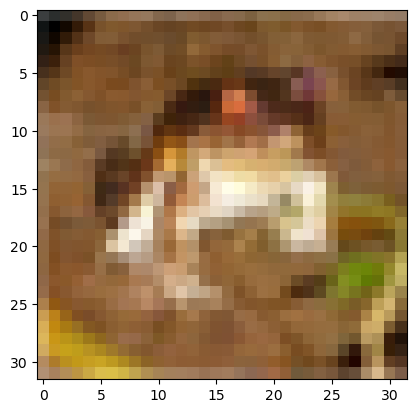

In [9]:
imshow(X)

In [33]:
X.flatten().unsqueeze(1).size()

torch.Size([3072, 1])

In [21]:
np.transpose(X, (1, 2, 0))

torch.Size([32, 32, 3])

In [35]:
logits = model(np.transpose(X.flatten().unsqueeze(1), (1, 0)))
pred_prob = nn.Softmax(dim=1)(logits)
Y_pred = pred_prob.argmax(1)

In [40]:
Y_pred, y

(tensor([3]), 6)

In [12]:
X.size()[0] * X.size()[1] * X.size()[2]

3072

In [24]:
X

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.